In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
from matplotlib import colors
from scipy import stats
import statistics
from scipy.optimize import curve_fit
import pwlf


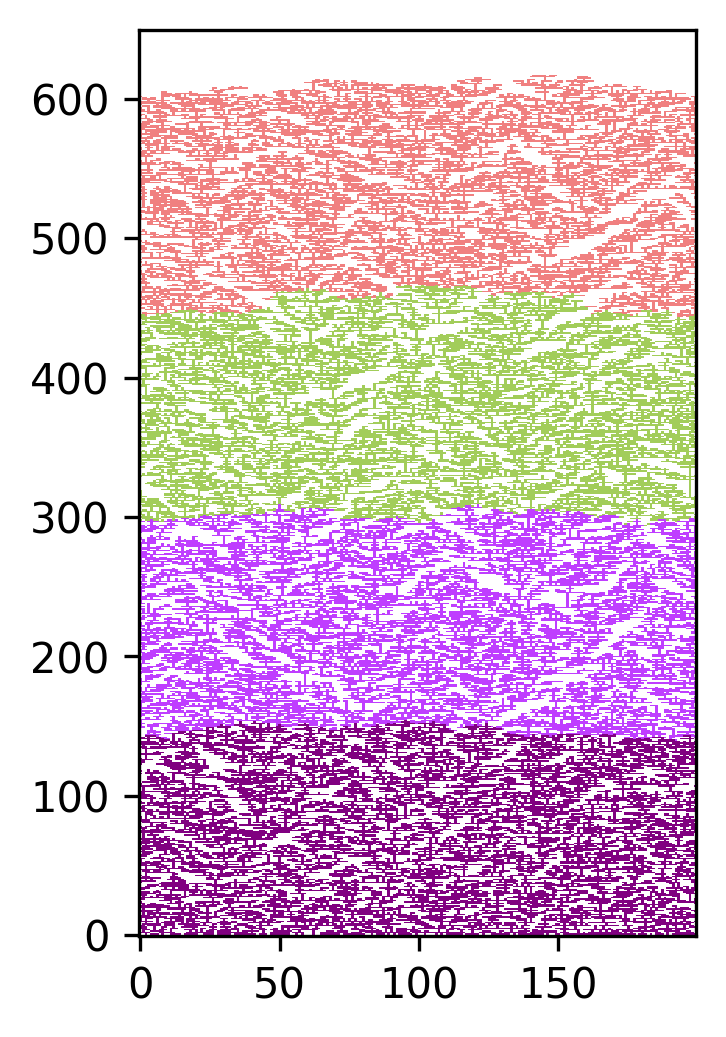

In [8]:
t = 100000
L = 200
h = np.zeros(L, dtype=int)
image_array = np.zeros((650,200),dtype=int)

plt.figure(dpi=300)

colorlist = colors.ListedColormap(['white','purple','#BF3EFF','#A2CD5A','#F08080'])
for i in range(t):

    color_i = ((i//(t//4)))+1                                     #dedicating different colors fro, colorlist for each 2500 squares
    x = rnd.randint(0,199)                                      #choosing a random number betweeen 0 and 199 (h imdex goes from 0 to 199)
             
    if h[x-199] == h[x-200] and h[x-199] == h[x-198]:           #considering boundary conditions and letting the snowflakes sit in the lowest neighbor

        h[x-199] += 1
    elif h[x-199]>h[x-200] and h[x-199]>h[x-198]: 
        h[x-199] += 1 
    elif h[x-200] > h[x-198]:
        h[x-199] = h[x-200]
    elif h[x-200] < h[x-198]:
        h[x-199] = h[x-198]
    elif h[x-200] == h[x-198]:
        y = rnd.randint(0,1)
        if y == 0:
            h[x-199] = h[x-200]
        else:
            h[x-199] = h[x-198]

            
    image_array[h[x-199]][x-199] = color_i          #building and array of the cells where imshow functions is going to color.
      
plt.imshow(image_array ,cmap = colorlist,interpolation='none', origin = 'lower' )       #coloring the specified cells in image_array with specified colors
   
    
ax = plt.gca()
ax.set_aspect(aspect=0.5)
plt.savefig('lowsit', dpi=300)
plt.show()   

In [19]:
t = 500000
L = 200
h = np.zeros(L, dtype=int)
steps = t//100
mean_number = 100               # Repeating the whole process for mean_number and make mean_numbers of lists consisting the variances.
w = np.zeros((t//steps))        # Calculating the variance in each process for t//steps times.
listofw = np.zeros((t//steps,mean_number)) 
listofmean = np.zeros(t//steps)


for j in range(mean_number):
    h = np.zeros(L, dtype=int)
    for i in range(t):

        x = rnd.randint(0,199)                                      #choosing a random number betweeen 0 and 199 (h imdex goes from 0 to 199)
             
        if h[x-199] == h[x-200] and h[x-199] == h[x-198]:           #considering boundary conditions and letting the snowflakes sit in the lowest neighbor

            h[x-199] += 1
        elif h[x-199]>h[x-200] and h[x-199]>h[x-198]: 
            h[x-199] += 1 
        elif h[x-200] > h[x-198]:
            h[x-199] = h[x-200]
        elif h[x-200] < h[x-198]:
            h[x-199] = h[x-198]
        elif h[x-200] == h[x-198]:
            y = rnd.randint(0,1)
            if y == 0:
                h[x-199] = h[x-200]
            else:
                h[x-199] = h[x-198]
             

        if i%(steps) == 0 and i!=0:                                        #setting steps for calculating mean and stadard deviation

            listofmean[i//steps] = (i/L)*(i/L)                                       #calculating mean  

            listofw[i//steps][j] = np.var(h)                                #calculating standard deviation


 

In [20]:
meanofw = [np.mean(listofw[i][:]) for i in range(t//steps)]        #calculating mean of 100(mean_number) standard deviations.
meanofw

[0.0,
 10.290228749999999,
 14.736267499999999,
 18.321043999999997,
 21.799881750000004,
 23.078309499999996,
 24.870540250000005,
 26.215342500000002,
 27.079352500000006,
 29.162532499999994,
 30.14477275,
 32.17387075,
 34.151017,
 35.698302749999996,
 37.458406249999996,
 36.32480150000001,
 37.08337075,
 36.98514425,
 37.85869925,
 37.6277945,
 37.36842274999999,
 37.05197125,
 36.77811225,
 35.553014250000004,
 36.593607999999996,
 37.252601250000005,
 37.27554275000001,
 36.48242175,
 36.54629775,
 35.005158,
 33.920835,
 34.4999565,
 34.71684825,
 35.581036999999995,
 35.8796045,
 34.62988625,
 35.90206499999999,
 37.39932400000001,
 35.63885425,
 36.139883749999996,
 36.3231915,
 35.426983250000006,
 36.55286625,
 36.549249,
 36.06694225,
 37.594151,
 36.24525875,
 36.90935575,
 37.18446900000001,
 35.05607075,
 35.49419675000001,
 36.282393750000004,
 35.44863599999999,
 35.68171924999999,
 37.61391925,
 35.011278250000004,
 33.146038000000004,
 32.38039775,
 32.1545045,
 32

No handles with labels found to put in legend.


start and end x of fitted lines are:[4.00440693 4.833831   5.69897   ]
the slopes fitted lines are:[0.44304969 0.02469368]
y of break point is[1.5490353]


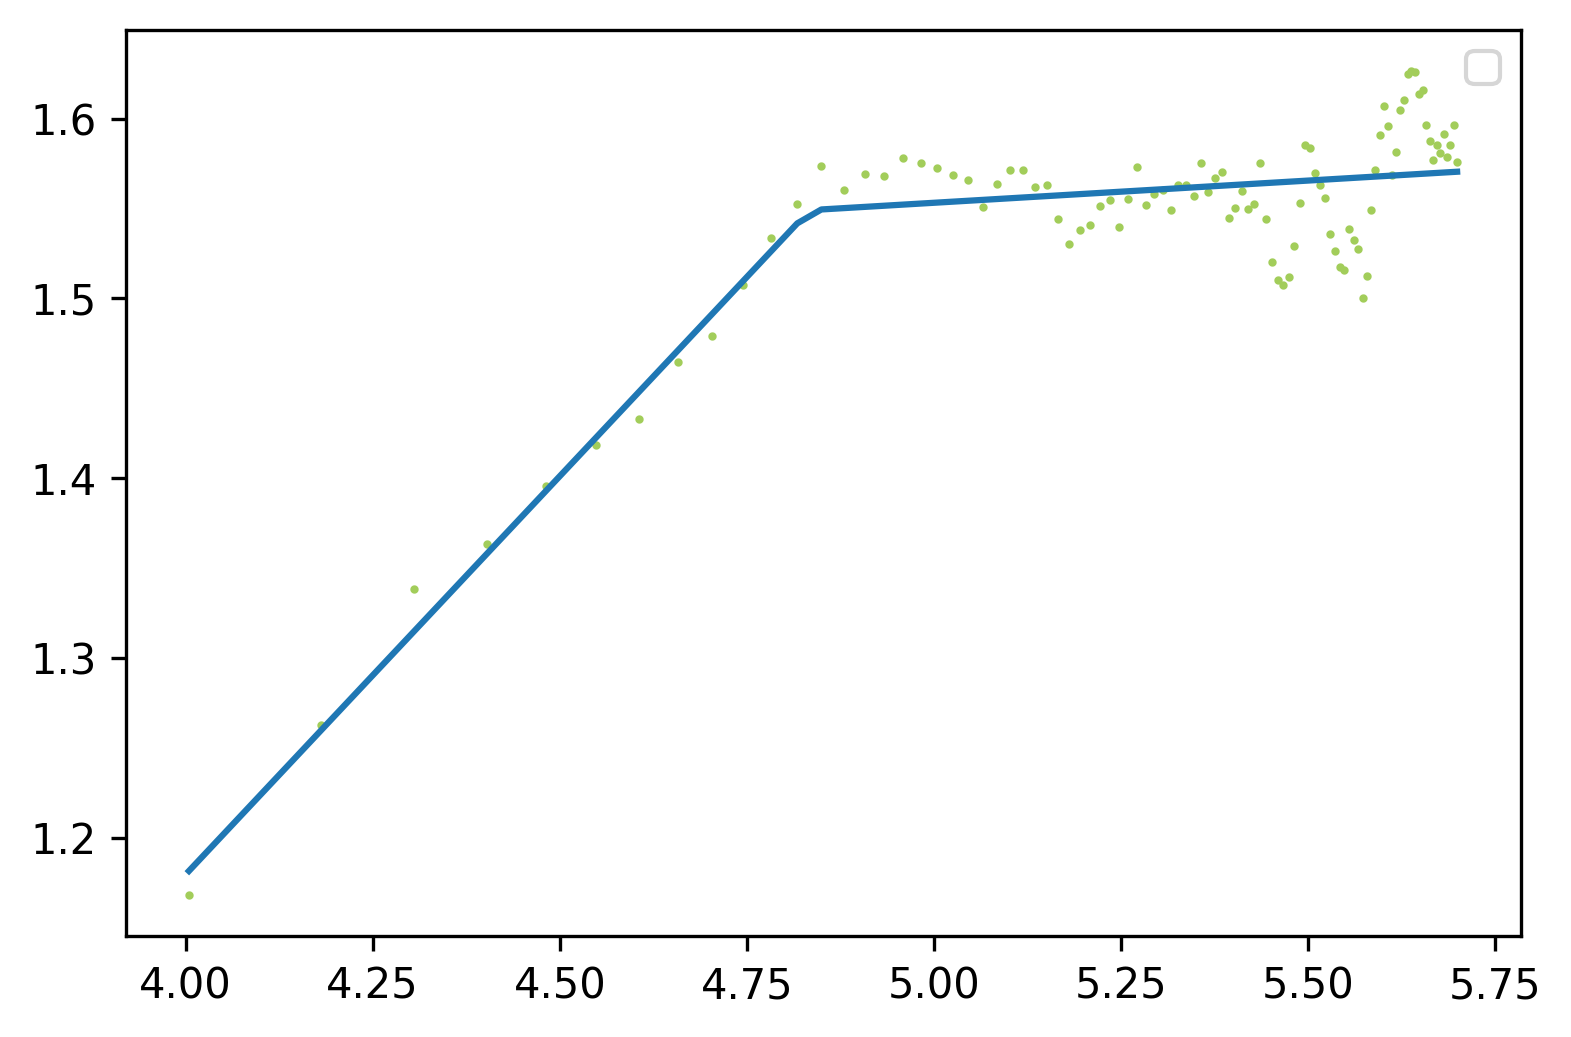

In [21]:

time= np.linspace(1,t,t//steps)
tlog = [np.log10(time[i]) for i in range(2,t//steps)]
meanofwlog = [np.log10(meanofw[i]) for i in range(2,t//steps)]
plt.figure(dpi=300)
plt.scatter(tlog,meanofwlog,s=[1],color ='#A2CD5A')                     #plotting standard deviation(t) in different times.


#plt.plot(t, p(t),color='#68228B',linewidth=0.8, label=f'$y = {round(popt[0],6)} {round(popt[1],6):+}$')     #popt[0] is the slope and popt[1] is the intercept
plt.legend()
ax.set_xlabel(f't')
ax.set_ylabel(f'w(t)')
ax.set_aspect('auto')
#plt.savefig('line1', dpi=600)

# initialize piecewise linear fit with tlog and meanofwlog
my_pwlf = pwlf.PiecewiseLinFit(tlog, meanofwlog)

# fit the data for two line segments
res = my_pwlf.fit(2)

# predicting for the determined  break points
yHat = my_pwlf.predict(tlog)
plt.plot(tlog, yHat, "-")
breaks = my_pwlf.fit_breaks                 #finding where the new slope begins

print("start and end x of fitted lines are:" + str(breaks))
slopes = my_pwlf.calc_slopes()              #calculating the slopes
print("the slopes fitted lines are:" + str(slopes))
print( "y of break point is" + str(my_pwlf.predict(breaks[1])))
ax = plt.gca()
plt.savefig('variancelowsit2', dpi=300)

plt.show()

In [22]:
z = breaks[1]/L
beta = slopes[0]
alpha = beta * z
print("z = " + str(z))
print("beta = "+ str(beta))
print("alpha = "+ str(alpha))

z = 0.024169155018296397
beta = 0.4430496854252268
alpha = 0.01070813652784976
